<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/2_0_FZ_start_end_registrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 CoachHandbook.docx	'Data Dictionary.gdoc'		   Texts.csv
 csv			 pre_process_round_1
'Data Dictionary.docx'	'Stats Consulting Data (1).xlsx'


In [44]:
root = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv"

output_dir = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1"

In [23]:
csv_files = []
# List all files under the directory
for root, dirs, files in os.walk(root):
    for file in files:
        csv_files.append(os.path.join(root, file))
csv_files

['/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/retention_milestone.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/onboarding_status.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/onboarding_medical_data.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/user_data.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/citizen_advisor_view.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/start_end_registrations.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/registrations_per_goal.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/daily_chat_activity.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/weight_milestones.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/intervention_history.csv',
 '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/goals_and_registrations.csv',
 '/cont

In [24]:
def csv_summary(df):
    print("Columns:")
    print(df.columns)

    # Display summary information
    print("Info:")
    print(df.info())

    # Display summary statistics
    print("Summary Statistics:")
    print(df.describe())

# start_end_registrations

In [29]:
se_reg_path = csv_files[5]
print(se_reg_path)
se_reg_df = pd.read_csv(se_reg_path)

# format cols
se_reg_df['startDate'] = pd.to_datetime(se_reg_df['startDate'], errors='coerce')
se_reg_df['endDate'] = pd.to_datetime(se_reg_df['endDate'], errors='coerce')

se_reg_df['type'] = se_reg_df['type'].astype(str)

csv_summary(se_reg_df)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/start_end_registrations.csv


<ipython-input-29-afc90e6787c5>:3: DtypeWarning: Columns (1,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  se_reg_df = pd.read_csv(se_reg_path)


Columns:
Index(['citizenId', 'type', 'valueCount', 'startValue', 'startDate',
       'endValue', 'endDate'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   citizenId   1048575 non-null  int64         
 1   type        1048575 non-null  object        
 2   valueCount  1303 non-null     float64       
 3   startValue  1303 non-null     float64       
 4   startDate   1303 non-null     datetime64[ns]
 5   endValue    1303 non-null     float64       
 6   endDate     1303 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 56.0+ MB
None
Summary Statistics:
          citizenId   valueCount    startValue      endValue
count  1.048575e+06  1303.000000  1.303000e+03  1.303000e+03
mean   1.221538e+03    83.620875  8.191507e+03  8.119613e+03
std    3.45

In [ ]:
se_reg_df.head()

# A large number of users do not set a goal type

When type is nan, the data is meaningless

In [33]:
# Assuming df is your DataFrame
unique_types = se_reg_df['type'].unique()
print("Unique Types:")
print(unique_types)
print(len(unique_types))

type_counts = se_reg_df['type'].value_counts()
print("Count of Each Unique Type:")
print(type_counts)


Unique Types:
['WEIGHT' 'DIET_RULES' 'EXERCISE' 'MEDICINE' 'STEPS' 'LIFE_RULES' 'SLEEP'
 'nan' 'PAIN' 'MOOD' 'BLOOD_PRESSURE' 'WAIST_HIP' 'FASTING_BLOOD_SUGAR'
 'BLOOD_SUGAR' 'ALCOHOL' 'CIGARETTES']
16
Count of Each Unique Type:
nan                    1047272
WEIGHT                     357
EXERCISE                   232
STEPS                      205
DIET_RULES                 203
LIFE_RULES                 105
SLEEP                       66
MOOD                        59
PAIN                        26
MEDICINE                    23
BLOOD_PRESSURE              12
FASTING_BLOOD_SUGAR          9
ALCOHOL                      2
CIGARETTES                   2
WAIST_HIP                    1
BLOOD_SUGAR                  1
Name: type, dtype: int64


In [45]:
nan_type_df = se_reg_df[se_reg_df['type'] == 'nan']
nan_type_df.head()

,citizenId,type,valueCount,startValue,startDate,endValue,endDate
40,831841,nan,NaN,NaN,NaT,NaN,NaT
230,909811,nan,NaN,NaN,NaT,NaN,NaT
426,955098,nan,NaN,NaN,NaT,NaN,NaT
427,955121,nan,NaN,NaN,NaT,NaN,NaT
487,964827,nan,NaN,NaN,NaT,NaN,NaT


In [47]:
csv_summary(nan_type_df)
print(len(nan_type_df))

Columns:
Index(['citizenId', 'type', 'valueCount', 'startValue', 'startDate',
       'endValue', 'endDate'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047272 entries, 40 to 1048574
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   citizenId   1047272 non-null  int64         
 1   type        1047272 non-null  object        
 2   valueCount  0 non-null        float64       
 3   startValue  0 non-null        float64       
 4   startDate   0 non-null        datetime64[ns]
 5   endValue    0 non-null        float64       
 6   endDate     0 non-null        datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 63.9+ MB
None
Summary Statistics:
          citizenId  valueCount  startValue  endValue
count  1.047272e+06         0.0         0.0       0.0
mean   9.193899e+00         NaN         NaN       NaN
std    2.980045e+03         NaN

# Thus we keep data with type only

In [48]:
df = se_reg_df[se_reg_df['type'] != 'nan']
print(len(df))

1303


In [49]:
df.head()

,citizenId,type,valueCount,startValue,startDate,endValue,endDate
0,810359,WEIGHT,1.0,73.0,2020-10-08,73.0,2020-10-08
1,811969,DIET_RULES,117.0,1.0,2020-10-13,1.0,2021-04-19
2,811969,EXERCISE,3.0,7.0,2021-03-25,30.0,2021-04-14
3,811969,MEDICINE,26.0,1.0,2020-10-13,1.0,2020-12-22
4,811969,STEPS,219.0,1752.0,2020-09-11,7974.0,2021-04-19


In [51]:
output_path = os.path.join(output_dir,"start_end_registrations.csv")
print(output_path)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1/start_end_registrations.csv


In [52]:
df.to_csv(output_path, index=False)

# Analysis goal type

In [55]:
unique_citi = df['citizenId'].unique()
print(f"there are {len(unique_citi)} unique citizen has goal")

there are 357 unique citizen has goal


In [58]:
# Group by 'citizenId' and count distinct 'type'
count_by_citizen = df.groupby('citizenId')['type'].nunique().reset_index(name='distinct_type_count')

# Sort by count
sorted_count = count_by_citizen.sort_values(by='distinct_type_count', ascending=False)

# Display sorted counts
print(sorted_count)


     citizenId  distinct_type_count
138     966345                   11
181     987689                   10
73      920115                    9
76      921863                    9
94      939136                    8
..         ...                  ...
36      891457                    1
220    1003812                    1
323    1058092                    1
213    1000132                    1
0       810359                    1

[357 rows x 2 columns]


<ipython-input-59-67c178e59709>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorted_count['distinct_type_count'], shade=True)


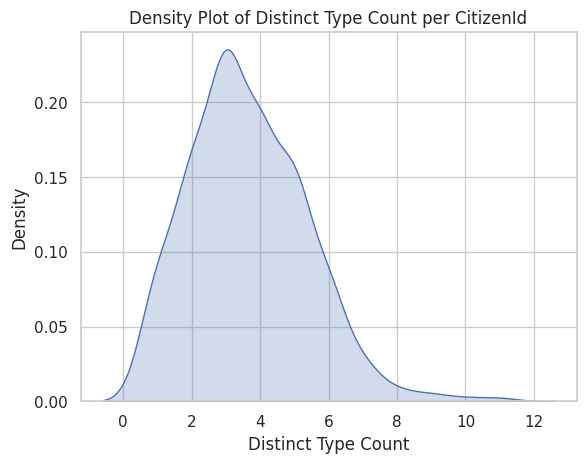

In [59]:
# Plot
sns.set(style="whitegrid")
sns.kdeplot(sorted_count['distinct_type_count'], shade=True)
plt.xlabel('Distinct Type Count')
plt.ylabel('Density')
plt.title('Density Plot of Distinct Type Count per CitizenId')
plt.show()

In [60]:
# Get the count of citizenId for each distinct distinct_type_count
citizen_count_by_distinct_type = sorted_count['distinct_type_count'].value_counts().reset_index().sort_values(by='index')
citizen_count_by_distinct_type.columns = ['distinct_type_count', 'citizenId_count']

# Display
print(citizen_count_by_distinct_type)

    distinct_type_count  citizenId_count
4                     1               34
2                     2               59
0                     3               90
1                     4               68
3                     5               58
5                     6               31
6                     7               10
7                     8                3
8                     9                2
10                   10                1
9                    11                1


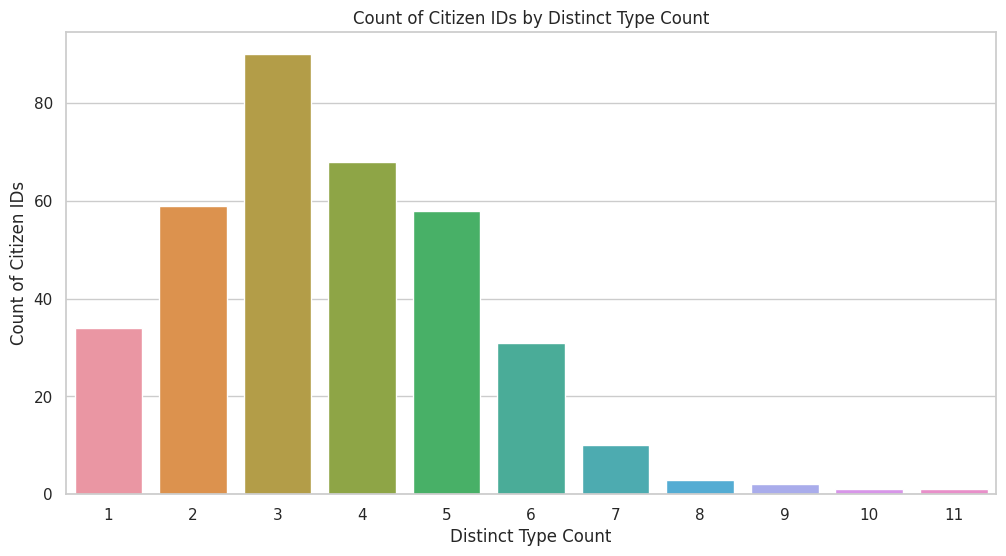

In [61]:
# Set up the visual appearance
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='distinct_type_count', y='citizenId_count', data=citizen_count_by_distinct_type)

# Add labels and title
plt.xlabel('Distinct Type Count')
plt.ylabel('Count of Citizen IDs')
plt.title('Count of Citizen IDs by Distinct Type Count')

# Show the plot
plt.show()